   Community Area  total_crimes  total_arrests  arrest_rate  Per Capita Income
1               1        109350          28723     0.262670            23714.0
2               2         90609          14721     0.162467            21375.0
3               3        103778          30635     0.295197            32355.0
4               4         50640           8948     0.176698            35503.0
5               5         41855           7541     0.180170            51615.0


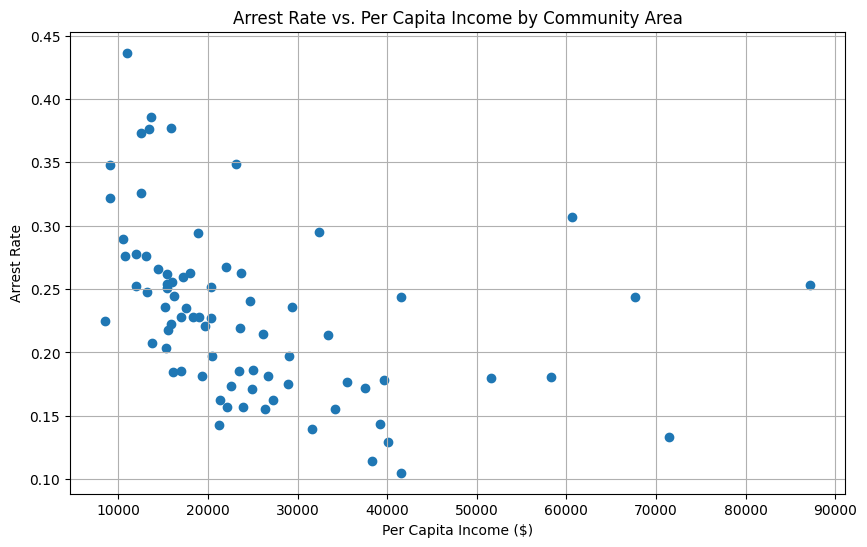

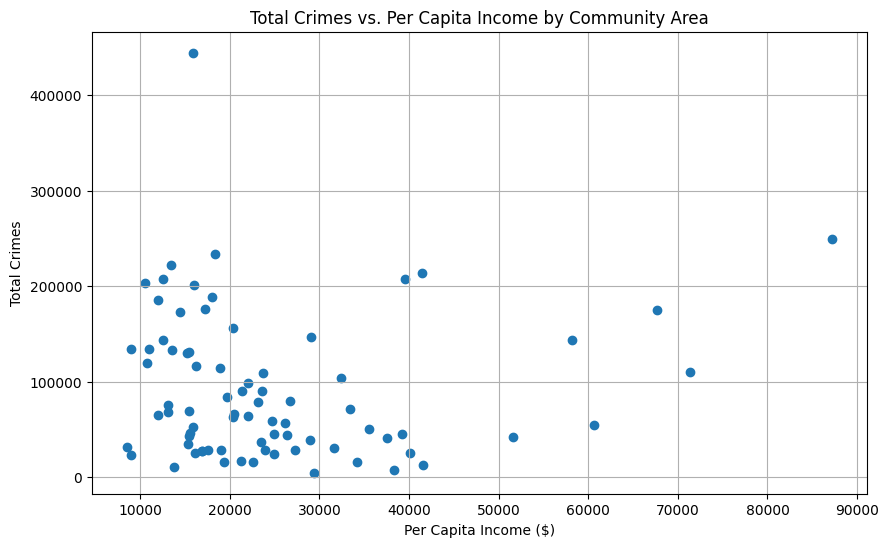


Correlation Matrix:
                   Per Capita Income  arrest_rate  total_crimes
Per Capita Income           1.000000    -0.376455      0.027977
arrest_rate                -0.376455     1.000000      0.551468
total_crimes                0.027977     0.551468      1.000000


In [1]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Data (recreate if needed) ---
# Load CleanedCrime
crime_df = pd.read_csv('../data/CleanedCrime.csv')

# Load Public Health / Income Data
income_df = pd.read_csv('../data/Public_Health_Statistics_-_Selected_public_health_indicators_by_Chicago_community_area_-_Historical.csv')

# --- Group and Merge Like Before ---
# Group crime by Community Area
arrest_by_area = crime_df.groupby('Community Area').agg(
    total_crimes=('Date', 'count'),
    total_arrests=('Arrest', 'sum')
).reset_index()

# Calculate Arrest Rate
arrest_by_area['arrest_rate'] = arrest_by_area['total_arrests'] / arrest_by_area['total_crimes']

# Make sure Community Area is int for clean merge
arrest_by_area['Community Area'] = arrest_by_area['Community Area'].astype(int)
income_df['Community Area'] = income_df['Community Area'].astype(int)

# Merge in Per Capita Income
merged_df = arrest_by_area.merge(
    income_df[['Community Area', 'Per Capita Income']],
    on='Community Area',
    how='left'
)

# --- Optional: Drop missing income values ---
merged_df = merged_df.dropna(subset=['Per Capita Income'])

# --- Quick Preview ---
print(merged_df.head())

# --- Scatterplot: Arrest Rate vs Per Capita Income ---
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Per Capita Income'], merged_df['arrest_rate'])
plt.title('Arrest Rate vs. Per Capita Income by Community Area')
plt.xlabel('Per Capita Income ($)')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.show()

# --- Scatterplot: Total Crimes vs Per Capita Income ---
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Per Capita Income'], merged_df['total_crimes'])
plt.title('Total Crimes vs. Per Capita Income by Community Area')
plt.xlabel('Per Capita Income ($)')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()

# --- Correlation Coefficients ---
correlation_matrix = merged_df[['Per Capita Income', 'arrest_rate', 'total_crimes']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
